# PREDICCIÓN DE LA EVOLUCIÓN DEL COVID

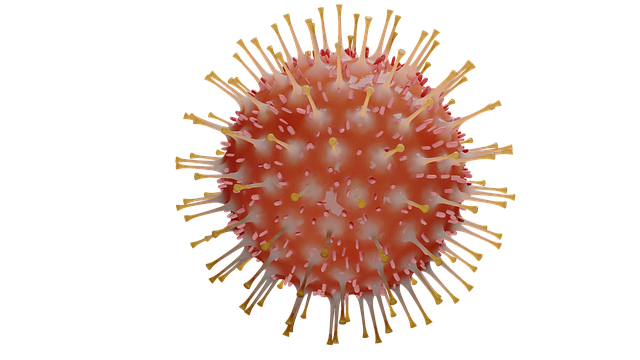

Realiza una predicción de la evolución del Covid en España (casos confirmados por cada 100.000 habitantes en 14 días).  
Para ello, haz un web scraping de la siguiente página web: https://datosmacro.expansion.com/otros/coronavirus/espana y aplica las téncnicas de series temporales que hemos aprendido

In [1]:
import pandas as pd
import numpy as np

In [19]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [48]:
tables = pd.read_html('https://datosmacro.expansion.com/otros/coronavirus/espana')
tables[0].to_csv('covid.csv',index=False)

In [49]:
tables[0]

,Fecha,Incremento Muertos,Muertos,Muertos / millón,Incremento Confirmados,Confirmados,Confirmados / 100.000 - 14 días
0,30/03/2022,222,102.541,"2.166,66",19.486,11.551.574,40503
1,28/03/2022,9,102.319,"2.161,97",6.601,11.532.088,44653
2,27/03/2022,12,102.310,"2.161,78",4.853,11.525.487,47578
3,26/03/2022,15,102.298,"2.161,53",6.813,11.520.634,48426
4,25/03/2022,21,102.283,"2.161,21",15.327,11.513.821,48946
...,...,...,...,...,...,...,...
95,24/12/2021,75,90.473,"1.911,67",75.375,5.996.179,"1.367,40"
96,23/12/2021,82,90.398,"1.910,09",97.120,5.920.804,"1.263,35"
97,22/12/2021,74,90.316,"1.908,35",86.479,5.823.684,"1.102,79"
98,21/12/2021,73,90.242,"1.906,79",74.607,5.737.205,94544


In [30]:
df = tables[0]
df['Confirmados'] = df['Confirmados / 100.000 - 14 días']
df = df[['Fecha','Confirmados']]

df['Confirmados2'] = df['Confirmados'].str.replace(',','').str.replace('.','')
df['Confirmados2'] = df['Confirmados2'].astype('int')/100
df = df[['Fecha','Confirmados2']]
df = df.iloc[::-1]
df

C:\Users\RZAMBR~1\AppData\Local\Temp/ipykernel_25380/1801231182.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\RZAMBR~1\AppData\Local\Temp/ipykernel_25380/1801231182.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\RZAMBR~1\AppData\Local\Temp/ipykernel_25380/1801231182.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Fecha,Confirmados2
99,20/12/2021,826.33
98,21/12/2021,945.44
97,22/12/2021,1102.79
96,23/12/2021,1263.35
95,24/12/2021,1367.40
...,...,...
4,25/03/2022,489.46
3,26/03/2022,484.26
2,27/03/2022,475.78
1,28/03/2022,446.53


In [34]:
df.dtypes

Fecha            object
Confirmados2    float64
dtype: object

In [40]:
df.iloc[0].Fecha

'20/12/2021'

In [42]:
df['Fecha'] = pd.to_datetime(df['Fecha'],format='%d/%m/%Y')
df

,Fecha,Confirmados2
99,2021-12-20,826.33
98,2021-12-21,945.44
97,2021-12-22,1102.79
96,2021-12-23,1263.35
95,2021-12-24,1367.40
...,...,...
4,2022-03-25,489.46
3,2022-03-26,484.26
2,2022-03-27,475.78
1,2022-03-28,446.53


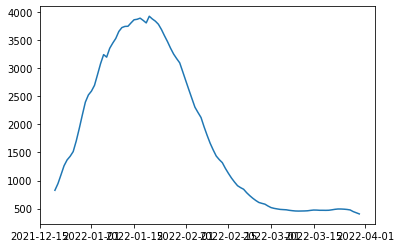

In [46]:
import matplotlib.pyplot as plt

plt.plot(df.Fecha,df.Confirmados2.values)

In [43]:
import plotly.express as px

fig = px.line(df, x='Fecha', y="Confirmados2")
fig.show()

In [51]:
df

,Fecha,Confirmados2
99,2021-12-20,826.33
98,2021-12-21,945.44
97,2021-12-22,1102.79
96,2021-12-23,1263.35
95,2021-12-24,1367.40
...,...,...
4,2022-03-25,489.46
3,2022-03-26,484.26
2,2022-03-27,475.78
1,2022-03-28,446.53


In [53]:
X = df['Confirmados2'].values
tp = int(len(X)*0.90)

train = X[:tp]
test = X[tp:]

In [54]:
len(train), len(test)

(90, 10)

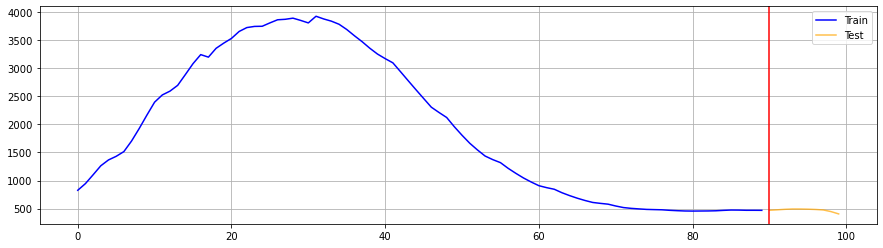

In [55]:
import matplotlib.pyplot as plt

index = df.iloc[::-1].index.values
plt.figure(figsize=(15,4))
plt.plot(index[0:tp],train,c='blue')
plt.plot(index[tp:],test,c='orange',alpha=0.7)
plt.legend(['Train','Test'])
plt.axvline(index[tp], c="r")
plt.grid()

# 1. ARIMA 

In [56]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

p = range(0,5)
d = range(0,3)
q = range(0,5)

pdq = list(itertools.product(p,d,q))

In [57]:
results = []

for param in pdq:
    model_arima = ARIMA(train, order=param)
    model_arima_fit = model_arima.fit()
    results.append((param,model_arima_fit.aic))

C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rzambrano\Anaconda3\envs\gen

C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [58]:
resultados_df = pd.DataFrame(results,columns=['ARIMA params','AIC']).sort_values('AIC')
resultados_df

,ARIMA params,AIC
74,"(4, 2, 4)",915.385666
42,"(2, 2, 2)",918.572185
58,"(3, 2, 3)",920.367466
57,"(3, 2, 2)",920.570127
43,"(2, 2, 3)",920.570345
...,...,...
4,"(0, 0, 4)",1207.170687
3,"(0, 0, 3)",1241.611942
2,"(0, 0, 2)",1343.020742
1,"(0, 0, 1)",1429.931928


In [59]:
best_model = ARIMA(train, order=(4,2,4))
best_model_fit = best_model.fit()
print(best_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   90
Model:                 ARIMA(4, 2, 4)   Log Likelihood                -448.693
Date:                Tue, 05 Apr 2022   AIC                            915.386
Time:                        20:51:45   BIC                            937.682
Sample:                             0   HQIC                           924.368
                                 - 90                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5680      0.146     10.754      0.000       1.282       1.854
ar.L2         -1.6992      0.307     -5.530      0.000      -2.301      -1.097
ar.L3          0.9483      0.324      2.927      0.0

C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [60]:
from sklearn.metrics import mean_squared_error
predictions = best_model_fit.predict(start=90,end=99)
print(mean_squared_error(test,predictions))

3477.5951350580494


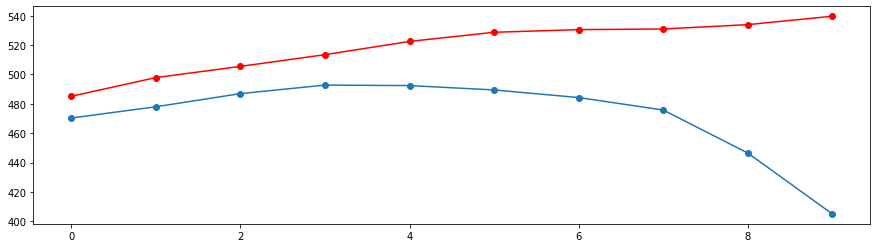

In [61]:
plt.figure(figsize=(15,4))
plt.plot(test,'o-')
plt.plot(predictions, 'o-', color='red')

In [62]:
np.corrcoef(predictions,test)

array([[ 1.        , -0.39475334],
       [-0.39475334,  1.        ]])

# 2. LSTM 

In [66]:
N = df.shape[0]
df2 = df[['Confirmados2']].copy()
emb_size=4

for i in range(1,emb_size+1):
    df2['lag'+str(i)] = df2['Confirmados2'].shift(i)

df2.dropna(inplace=True)
df2.reset_index(drop=True,inplace=True)

values = df2.values
trainX, trainY = values[0:tp-emb_size,1:], values[0:tp-emb_size, 0]
testX, testY = values[tp-emb_size:N-emb_size,1:], values[tp-emb_size:N-emb_size,0]

print("Train data length:", trainX.shape)
print("Train target length:", trainY.shape)
print("Test data length:", testX.shape)
print("Test target length:", testY.shape)

Train data length: (86, 4)
Train target length: (86,)
Test data length: (10, 4)
Test target length: (10,)


In [67]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [68]:
print("Training data shape:", trainX.shape,', ',trainY.shape)
print("Test data shape:", testX.shape,', ',testY.shape)

Training data shape: (86, 1, 4) ,  (86,)
Test data shape: (10, 1, 4) ,  (10,)


In [69]:
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback

def build_simple_rnn(num_units=128, embedding=4, num_dense=32, lr=0.001):
    """
    Builds and compiles a RNN model
    Arguments:
             num_units: Number of units of a RNN layer
             embedding: Embedding length
             num_dense: Number de neuronas in the dense layer
             lr: Learning rate
     Returns:
             A compiled Keras model
    """
    model = Sequential()
    model.add(LSTM(units=num_units, input_shape=(1,embedding), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=lr),
                 metrics=['mse'])
    
    return model

In [70]:
model = build_simple_rnn()

In [71]:
'''
Enseña mensaje si la epoch es multiplo de 50 y no ha acabado de entrenar.
Cada vez que termina una epoch, keras llama a on_epoch_end()
'''
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch+1) % 50 == 0 and epoch>0:
            print("Epoch number {} done".format(epoch+1))

In [72]:
batch_size=None
num_epochs = 50

In [73]:
model.fit(trainX,trainY, 
          epochs=num_epochs, 
          batch_size=batch_size, 
          callbacks=[MyCallback()],verbose=0)

Epoch number 50 done


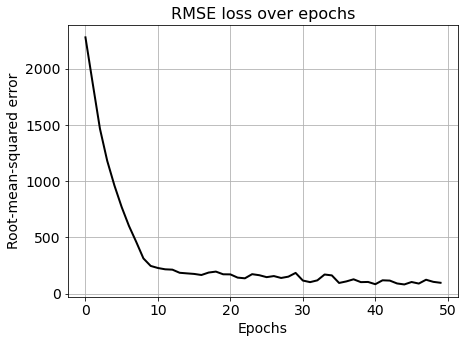

In [74]:
plt.figure(figsize=(7,5))
plt.title("RMSE loss over epochs",fontsize=16)
plt.plot(np.sqrt(model.history.history['loss']),c='k',lw=2)
plt.grid(True)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Root-mean-squared error",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [75]:
testPredict = model.predict(testX)

In [76]:
print(mean_squared_error(test,testPredict))

342.52469640323585


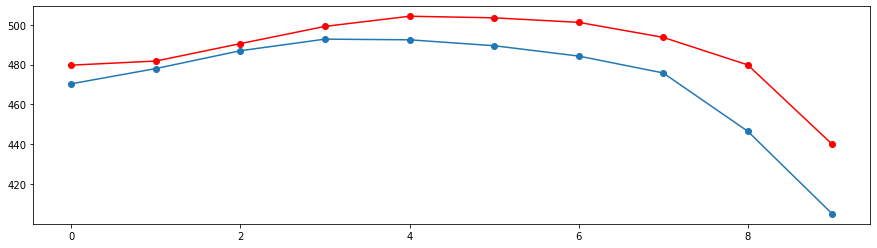

In [77]:
plt.figure(figsize=(15,4))
plt.plot(test,'o-')
plt.plot(testPredict, 'o-', color='red')

In [85]:
np.corrcoef(test,testPredict.reshape(-1))

array([[1.       , 0.9443452],
       [0.9443452, 1.       ]])